In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)


In [2]:
with open("../artifacts/models/logistic_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("../data/processed/X_test.pkl", "rb") as f:
    X_test = pickle.load(f)

with open("../data/processed/y_test.pkl", "rb") as f:
    y_test = pickle.load(f)

print("Model and test data loaded successfully.")


UnpicklingError: invalid load key, '\x0f'.

In [ ]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]


In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Test Accuracy:", acc)


Test Accuracy: 0.8448665057990192


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.70      0.22      0.33      2274
         1.0       0.85      0.98      0.91     10573

    accuracy                           0.84     12847
   macro avg       0.78      0.60      0.62     12847
weighted avg       0.83      0.84      0.81     12847



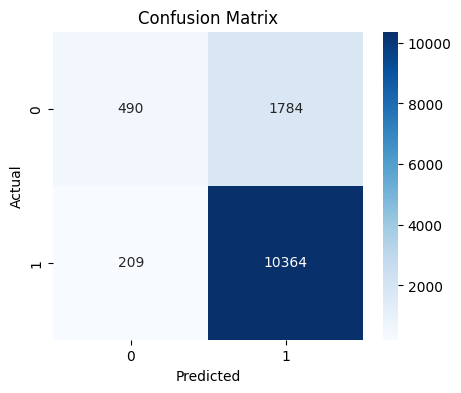

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


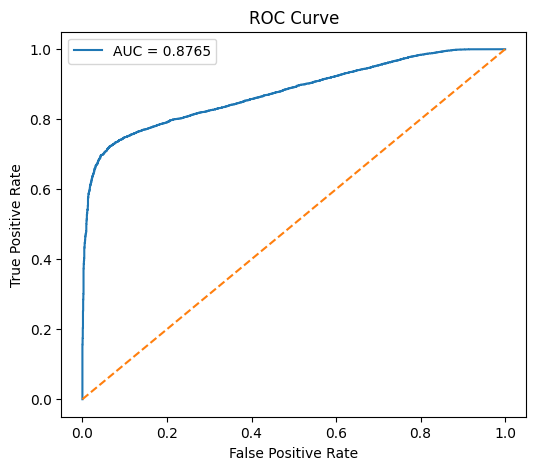

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


In [ ]:
errors = pd.DataFrame({
    "Actual": y_test,
    "Predicted": y_pred
})

errors["Error_Type"] = np.where(errors["Actual"] == errors["Predicted"], "Correct", "Incorrect")

errors["Error_Type"].value_counts()


Error_Type
Correct      10854
Incorrect     1993
Name: count, dtype: int64

In [ ]:
misclassified = errors[errors["Error_Type"] == "Incorrect"]
misclassified.head(10)


,Actual,Predicted,Error_Type
46419,0.0,1.0,Incorrect
60026,0.0,1.0,Incorrect
52847,0.0,1.0,Incorrect
40191,0.0,1.0,Incorrect
54040,0.0,1.0,Incorrect
54797,0.0,1.0,Incorrect
55886,0.0,1.0,Incorrect
57322,0.0,1.0,Incorrect
54677,0.0,1.0,Incorrect
52522,1.0,0.0,Incorrect


In [ ]:
print("Model Evaluation Completed Successfully")
print(f"Accuracy: {acc}")
print(f"AUC: {roc_auc}")


Model Evaluation Completed Successfully
Accuracy: 0.8448665057990192
AUC: 0.8765366321560011
